### (0 баллов) Считываем данные

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Каждая квартира имеет 13 признаков:

In [75]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [76]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [77]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [78]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [79]:
from sklearn.model_selection import train_test_split

In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [9]:
from sklearn.linear_model import LinearRegression

In [81]:
reg = LinearRegression()
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [82]:
from sklearn.metrics import mean_squared_error
def MSE(y_real, y_pred):
    return np.sum((y_real - y_pred)**2) / y_real.size

In [83]:
a = np.array([1, 2, 3, 4, 5])
b = np.array([5, 4, 3, 2, 1])

In [84]:
mean_squared_error(a, b)

8.0

In [85]:
MSE(a, b) #совпадает

8.0

In [86]:
MSE(y_test, y_pred)

14.995852876582541

In [87]:
mean_squared_error(y_test, y_pred)

14.995852876582541

Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

Сложно сказать, насколько это хороший результат.

In [88]:
MSE(y_test, y_train.mean())

65.00802631111615

Но он дает в 4 раза лучший результат по сравнению с наивным.

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [20]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score

In [91]:
lambdas = np.arange(0.1, 250.0, 10)
print("Все лямбды:")
print(lambdas)


lambda_errors = []
lambda_errors_list = []
# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Ridge(alpha=val)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors.append((val, np.mean(-cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error'))))
    lambda_errors_list.append(np.mean(-cross_val_score(reg, X, y, cv=5, scoring='neg_mean_squared_error')))

min_val, min_train_error = min(lambda_errors, key=lambda x: x[1])


print("\nОптимальная lambda:")
print("Lambda={:.2f}, результат={:.2f}".format(min_val, min_train_error))

Все лямбды:
[1.000e-01 1.010e+01 2.010e+01 3.010e+01 4.010e+01 5.010e+01 6.010e+01
 7.010e+01 8.010e+01 9.010e+01 1.001e+02 1.101e+02 1.201e+02 1.301e+02
 1.401e+02 1.501e+02 1.601e+02 1.701e+02 1.801e+02 1.901e+02 2.001e+02
 2.101e+02 2.201e+02 2.301e+02 2.401e+02]

Оптимальная lambda:
Lambda=150.10, результат=29.75


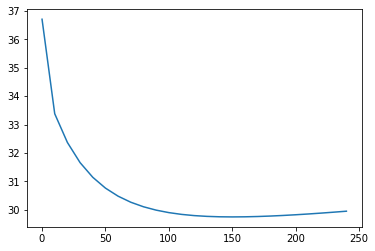

In [92]:
plt.plot(lambdas, lambda_errors_list)

Построим зависимость MSE от лямбды на тестовой выборке:

In [94]:
lambdas = np.arange(0.1, 250.0, 10)
print("Все лямбды:")
print(lambdas)


lambda_errors = []
lambda_errors_list = []
# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Ridge(alpha=val).fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors_list.append(MSE(y_test, y_pred))


Все лямбды:
[1.000e-01 1.010e+01 2.010e+01 3.010e+01 4.010e+01 5.010e+01 6.010e+01
 7.010e+01 8.010e+01 9.010e+01 1.001e+02 1.101e+02 1.201e+02 1.301e+02
 1.401e+02 1.501e+02 1.601e+02 1.701e+02 1.801e+02 1.901e+02 2.001e+02
 2.101e+02 2.201e+02 2.301e+02 2.401e+02]


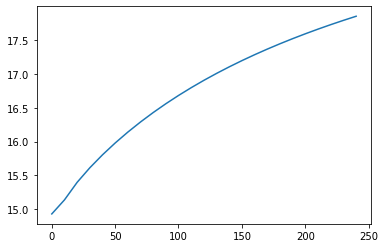

In [95]:
plt.plot(lambdas, lambda_errors_list)

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

Не помогла. Если смотреть на график MSE на тестовой выборке, то получается, что лучше обычная линейная регрессия.

In [23]:
ridge = Ridge(alpha=150)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [24]:
MSE(y_test, y_pred_ridge)

17.19339089690881

Попробуем Lasso:

In [99]:
lambdas = np.arange(0.1, 10.0, 0.1)
print("Все лямбды:")
print(lambdas)


lambda_errors = []
lambda_errors_list = []
# Проходим по всем лямбдам и записываем ошибки на обучающей выборке
for val in lambdas:
    reg = Lasso(alpha=val).fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    # Сохраняем ошибку на обучающей выборке
    lambda_errors_list.append(MSE(y_test, y_pred))

Все лямбды:
[0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7 1.8
 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5 3.6
 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3 5.4
 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1 7.2
 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9 9.
 9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]


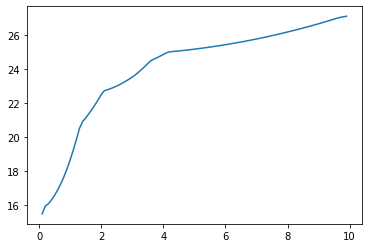

In [100]:
plt.plot(lambdas, lambda_errors_list)

In [27]:
lasso = Lasso(alpha=0.3)
lasso.fit(X_train, y_train)
y_pred_ridge = lasso.predict(X_test)

In [28]:
MSE(y_test, y_pred_ridge)

16.066976511686818

Чуть лучше, чем Ridge, но все равно хуже обычной.

Получается, что регрессия без регуляризации справляется здесь лучше всего.

In [74]:
#boston = pd.DataFrame(dataset.data, columns=dataset.feature_names)
#boston.head()

In [59]:
#boston['MEDV'] = dataset.target

In [61]:
#rooms = boston["RM"]
#boston["price_per_bedroom"] = boston["MEDV"] / rooms

In [66]:
#X = boston.drop('MEDV', axis=1)

In [68]:
#y = boston['MEDV']

In [69]:
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [70]:
#reg = LinearRegression()
#reg.fit(X_train, y_train)
#y_pred = reg.predict(X_test)